## DATA 5100 Project

Participants -

- Janhavi Gunjal
- Mohit Amode
- Nidhi Trivedi



# Reading Data

In [78]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [79]:
#Read data

data = pd.read_csv("https://raw.githubusercontent.com/mohitamode/Data-5100-Project/main/SMD_Hourly_NH.csv")

In [80]:
data.head()

,Date,Hr_End,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,RT_CC,RT_MLC,Dry_Bulb,Dew_Point
0,1-Jan-20,1,"1,045.20","1,080.18",23.66,23.54,0.02,0.10,23.41,23.21,0.0,0.20,32,30
1,1-Jan-20,2,"1,022.00","1,034.73",18.84,18.75,0.02,0.07,18.65,18.54,0.0,0.11,34,27
2,1-Jan-20,3,952.70,"1,005.34",16.68,16.67,0.01,0.00,17.73,17.65,0.0,0.08,34,26
3,1-Jan-20,4,967.20,"1,000.61",16.57,16.55,0.01,0.01,17.24,17.16,0.0,0.08,33,24
4,1-Jan-20,5,961.80,"1,011.07",15.62,15.61,0.01,0.00,17.19,17.11,0.0,0.08,31,24


In [81]:
data.tail()

,Date,Hr_End,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,RT_CC,RT_MLC,Dry_Bulb,Dew_Point
26299,31-Dec-22,20,"1,241.50","1,282.79",39.04,38.97,0.0,0.07,26.38,26.27,0.0,0.11,51,49
26300,31-Dec-22,21,"1,194.00","1,219.79",38.91,38.88,0.0,0.03,25.33,25.31,0.0,0.02,50,48
26301,31-Dec-22,22,"1,127.40","1,158.51",38.70,38.73,0.0,-0.03,31.70,31.69,0.0,0.01,46,45
26302,31-Dec-22,23,994.00,"1,092.78",38.79,38.69,0.0,0.10,44.15,44.16,0.0,-0.01,45,44
26303,31-Dec-22,24,897.90,"1,032.95",39.06,38.95,0.0,0.11,58.67,58.63,0.0,0.04,45,44


In [82]:
data.shape

(26304, 14)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       26304 non-null  object 
 1   Hr_End     26304 non-null  int64  
 2   DA_Demand  26304 non-null  object 
 3   RT_Demand  26304 non-null  object 
 4   DA_LMP     26304 non-null  float64
 5   DA_EC      26304 non-null  float64
 6   DA_CC      26304 non-null  float64
 7   DA_MLC     26304 non-null  float64
 8   RT_LMP     26304 non-null  float64
 9   RT_EC      26304 non-null  float64
 10  RT_CC      26304 non-null  float64
 11  RT_MLC     26304 non-null  float64
 12  Dry_Bulb   26304 non-null  int64  
 13  Dew_Point  26304 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 2.8+ MB


In [84]:
data.columns

Index(['Date', 'Hr_End', 'DA_Demand', 'RT_Demand', 'DA_LMP', 'DA_EC', 'DA_CC',
       'DA_MLC', 'RT_LMP', 'RT_EC', 'RT_CC', 'RT_MLC', 'Dry_Bulb',
       'Dew_Point'],
      dtype='object')

In [85]:
column = ['Date', 'Hr_End', 'Dry_Bulb', 'Dew_Point', 'RT_Demand']
df = data[column]

In [86]:
df.head()

,Date,Hr_End,Dry_Bulb,Dew_Point,RT_Demand
0,1-Jan-20,1,32,30,"1,080.18"
1,1-Jan-20,2,34,27,"1,034.73"
2,1-Jan-20,3,34,26,"1,005.34"
3,1-Jan-20,4,33,24,"1,000.61"
4,1-Jan-20,5,31,24,"1,011.07"


In [87]:
df.shape

(26304, 5)

In [88]:
df.isnull().sum()

Date         0
Hr_End       0
Dry_Bulb     0
Dew_Point    0
RT_Demand    0
dtype: int64

*There are no null values in the data.*

In [89]:
# RT_Demand is of string type and includes ',' we convert this into numeric type

df['RT_Demand'][1]

'1,034.73'

In [90]:
df['RT_Demand'] = df['RT_Demand'].str.replace(',', '', regex=True)
df['RT_Demand'] = pd.to_numeric(df['RT_Demand'], errors='coerce')

<ipython-input-90-ba98c24e5679>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RT_Demand'] = df['RT_Demand'].str.replace(',', '', regex=True)
<ipython-input-90-ba98c24e5679>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RT_Demand'] = pd.to_numeric(df['RT_Demand'], errors='coerce')


In [91]:
df.head()

,Date,Hr_End,Dry_Bulb,Dew_Point,RT_Demand
0,1-Jan-20,1,32,30,1080.18
1,1-Jan-20,2,34,27,1034.73
2,1-Jan-20,3,34,26,1005.34
3,1-Jan-20,4,33,24,1000.61
4,1-Jan-20,5,31,24,1011.07


In [92]:
df.describe()

,Hr_End,Dry_Bulb,Dew_Point,RT_Demand
count,26304.000000,26304.000000,26304.000000,26304.000000
mean,12.500000,49.142868,37.412979,1295.403027
std,6.922318,19.677216,19.708705,262.760616
min,1.000000,-9.000000,-19.000000,769.480000
25%,6.750000,34.000000,23.000000,1110.892500
50%,12.500000,49.000000,37.000000,1276.955000
75%,18.250000,65.000000,55.000000,1449.707500
max,24.000000,97.000000,75.000000,2462.240000


In [93]:
#Adding new column, DayOfWeek

from datetime import date
import calendar

df['DayOfWeek'] = pd.to_datetime(df['Date']).dt.day_name()
df.head()

<ipython-input-93-9a4dca5da95e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'] = pd.to_datetime(df['Date']).dt.day_name()


,Date,Hr_End,Dry_Bulb,Dew_Point,RT_Demand,DayOfWeek
0,1-Jan-20,1,32,30,1080.18,Wednesday
1,1-Jan-20,2,34,27,1034.73,Wednesday
2,1-Jan-20,3,34,26,1005.34,Wednesday
3,1-Jan-20,4,33,24,1000.61,Wednesday
4,1-Jan-20,5,31,24,1011.07,Wednesday


# Data Visualization

<Axes: xlabel='DayOfWeek', ylabel='RT_Demand'>

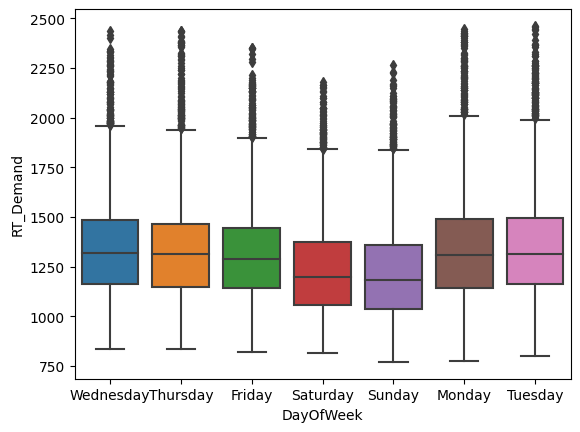

In [94]:
sns.boxplot(data = df, x = 'DayOfWeek', y = 'RT_Demand')

<Axes: xlabel='Dry_Bulb', ylabel='Dew_Point'>

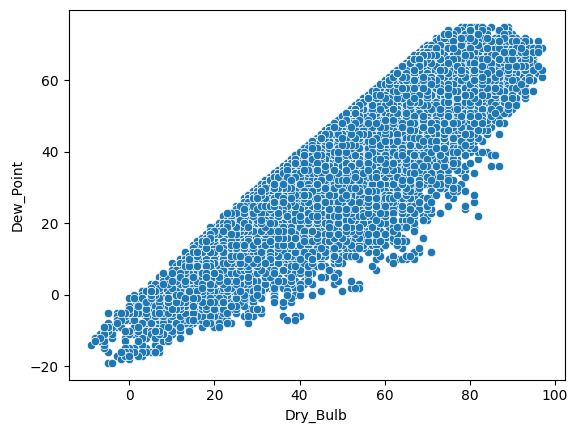

In [95]:
sns.scatterplot(data = df, x = 'Dry_Bulb', y = 'Dew_Point')

<Axes: xlabel='Dry_Bulb', ylabel='Dew_Point'>

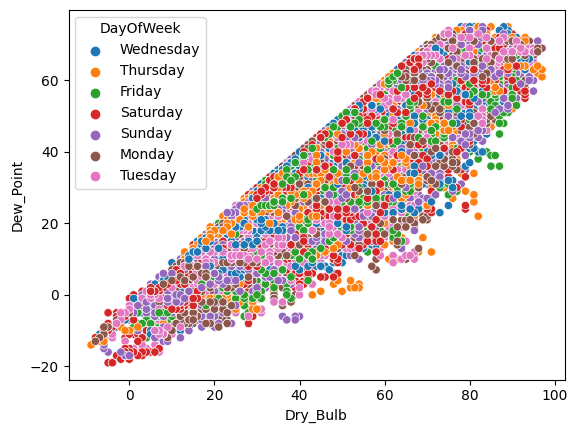

In [96]:
sns.scatterplot(data = df, x = 'Dry_Bulb', y = 'Dew_Point', hue = 'DayOfWeek')

<Axes: xlabel='Dry_Bulb', ylabel='Dew_Point'>

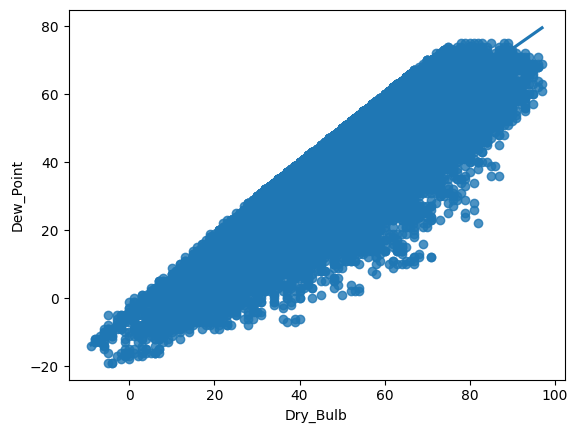

In [97]:
sns.regplot(x = 'Dry_Bulb', y = 'Dew_Point', data = df)

In [98]:
df['Date'] = pd.to_datetime(df['Date'])

def find_season(date):
  if date.month in [12, 1, 2]:
    return 'Winter'
  elif date.month in [3, 4, 5]:
    return 'Spring'
  elif date.month in [6, 7, 8]:
    return 'Summer'
  else:
    return 'Fall'

df['Season'] = df['Date'].apply(find_season)
df.head()

<ipython-input-98-594e072412b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-98-594e072412b1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df['Date'].apply(find_season)


,Date,Hr_End,Dry_Bulb,Dew_Point,RT_Demand,DayOfWeek,Season
0,2020-01-01,1,32,30,1080.18,Wednesday,Winter
1,2020-01-01,2,34,27,1034.73,Wednesday,Winter
2,2020-01-01,3,34,26,1005.34,Wednesday,Winter
3,2020-01-01,4,33,24,1000.61,Wednesday,Winter
4,2020-01-01,5,31,24,1011.07,Wednesday,Winter


<Axes: xlabel='Season', ylabel='RT_Demand'>

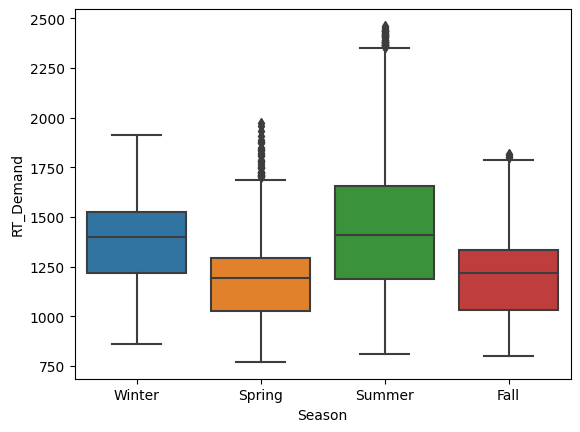

In [99]:
sns.boxplot(x = 'Season', y = 'RT_Demand', data = df)

<ipython-input-100-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

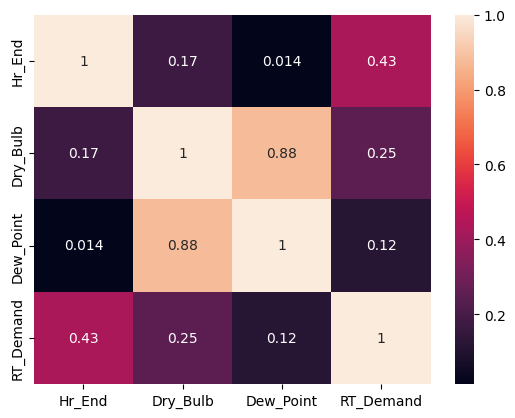

In [100]:
sns.heatmap(df.corr(), annot = True)

<Axes: xlabel='RT_Demand', ylabel='Dew_Point'>

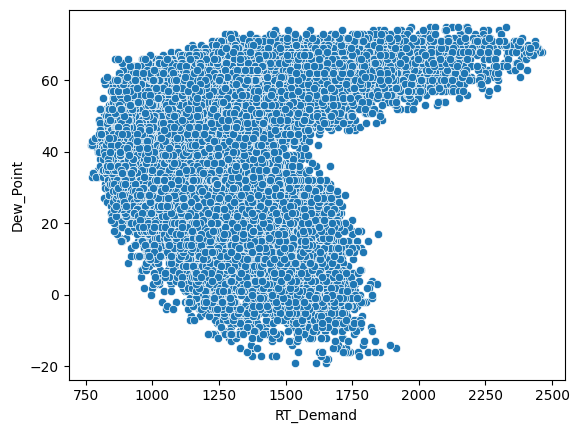

In [101]:
sns.scatterplot(data = df, x = 'RT_Demand', y = 'Dew_Point')

<Axes: xlabel='RT_Demand', ylabel='Dry_Bulb'>

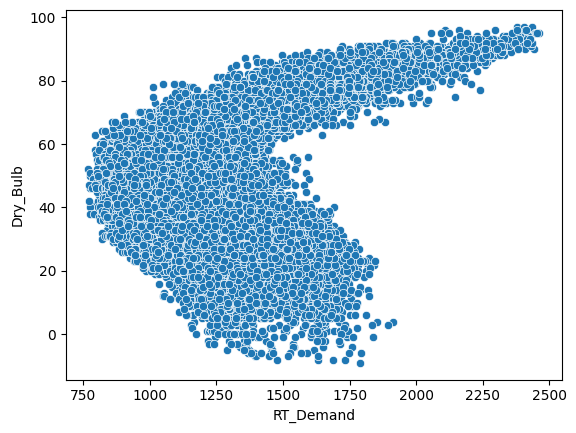

In [102]:
sns.scatterplot(x = 'RT_Demand', y = 'Dry_Bulb', data = df)

<Axes: xlabel='RT_Demand', ylabel='Dew_Point'>

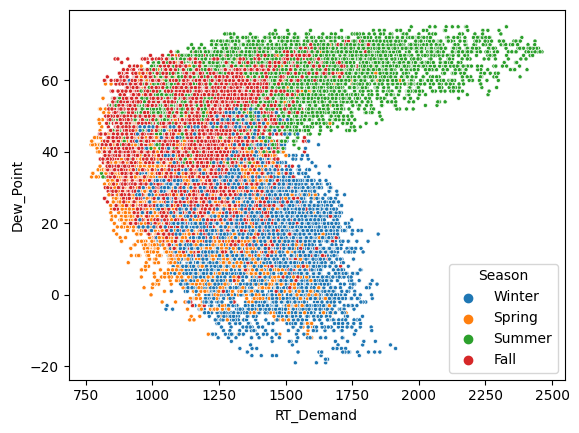

In [103]:
sns.scatterplot(x = 'RT_Demand', y = 'Dew_Point', hue = 'Season', data = df, marker = '.')

<Axes: xlabel='RT_Demand', ylabel='Dry_Bulb'>

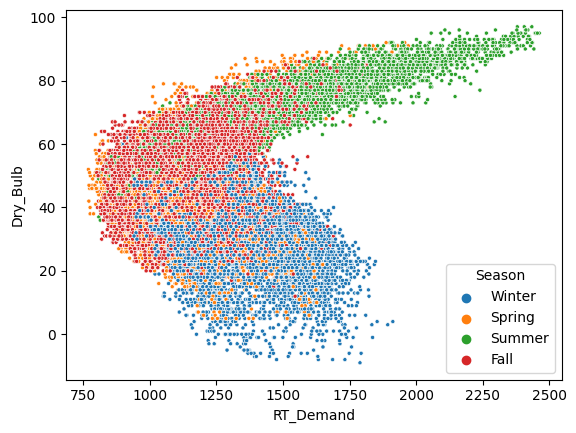

In [104]:
sns.scatterplot(x = 'RT_Demand', y = 'Dry_Bulb', hue = 'Season', data = df, marker = '.')

In [105]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

<ipython-input-105-346a77fbc836>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month
<ipython-input-105-346a77fbc836>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Date'].dt.day


In [106]:
df['Date'].dt.weekday.unique()

array([2, 3, 4, 5, 6, 0, 1])

In [107]:
# Since the weekdays are 0 to 6, we add 1 to adjust it to 1 through 7

df['Weekday'] = df['Date'].dt.weekday + 1
df['Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 6 else 0)

<ipython-input-107-6251c4674710>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday'] = df['Date'].dt.weekday + 1
<ipython-input-107-6251c4674710>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 6 else 0)


In [108]:
# Interaction variable and squared variables

df['Dry_Bulb_sq'] = df['Dry_Bulb'] ** 2
df['Dew_Point_sq'] = df['Dew_Point'] ** 2
df['Dew_Point_Dry_Bulb'] = df['Dry_Bulb'] * df['Dew_Point']

df.head()

<ipython-input-108-65a16cbd0110>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dry_Bulb_sq'] = df['Dry_Bulb'] ** 2
<ipython-input-108-65a16cbd0110>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dew_Point_sq'] = df['Dew_Point'] ** 2


,Date,Hr_End,Dry_Bulb,Dew_Point,RT_Demand,DayOfWeek,Season,Month,Day,Weekday,Weekend,Dry_Bulb_sq,Dew_Point_sq,Dew_Point_Dry_Bulb
0,2020-01-01,1,32,30,1080.18,Wednesday,Winter,1,1,3,0,1024,900,960
1,2020-01-01,2,34,27,1034.73,Wednesday,Winter,1,1,3,0,1156,729,918
2,2020-01-01,3,34,26,1005.34,Wednesday,Winter,1,1,3,0,1156,676,884
3,2020-01-01,4,33,24,1000.61,Wednesday,Winter,1,1,3,0,1089,576,792
4,2020-01-01,5,31,24,1011.07,Wednesday,Winter,1,1,3,0,961,576,744


In [109]:
df.columns

Index(['Date', 'Hr_End', 'Dry_Bulb', 'Dew_Point', 'RT_Demand', 'DayOfWeek',
       'Season', 'Month', 'Day', 'Weekday', 'Weekend', 'Dry_Bulb_sq',
       'Dew_Point_sq', 'Dew_Point_Dry_Bulb'],
      dtype='object')

Text(0, 0.5, 'Load')

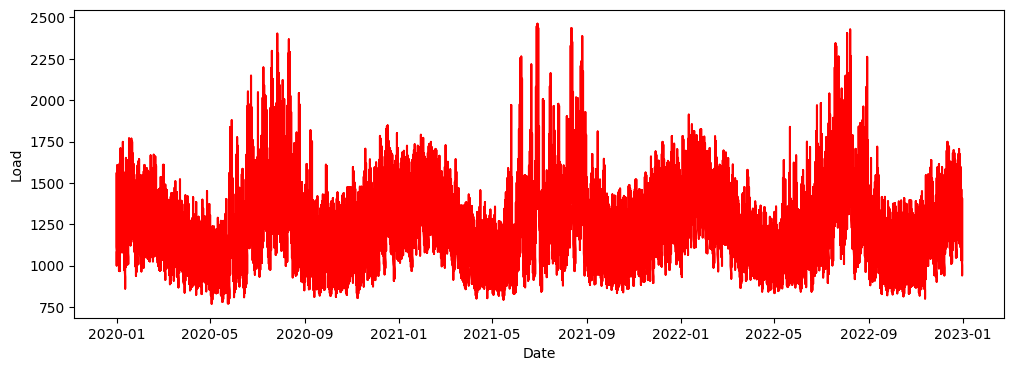

In [110]:
plt.figure(figsize=(12,4))
plt.plot(df['Date'], df['RT_Demand'], c = 'Red')
plt.xlabel('Date')
plt.ylabel('Load')

<Axes: xlabel='Month', ylabel='RT_Demand'>

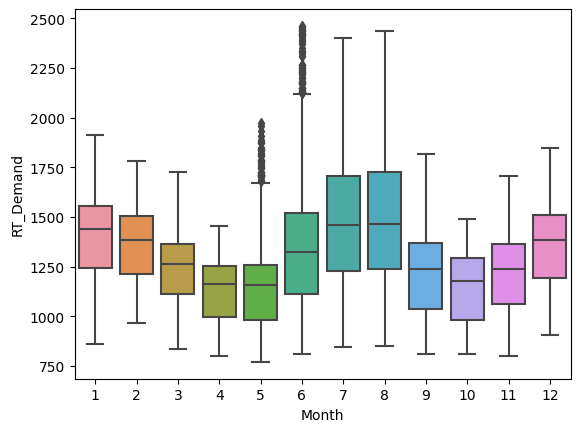

In [111]:
sns.boxplot(x = 'Month', y = 'RT_Demand', data = df)

<Axes: xlabel='RT_Demand', ylabel='Season'>

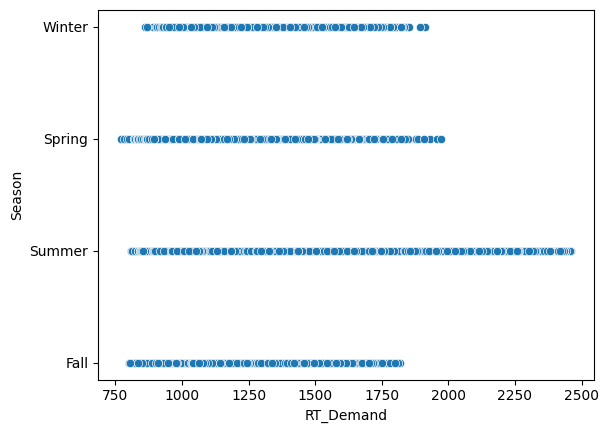

In [112]:
sns.scatterplot(data = df, x = 'RT_Demand', y = 'Season')

<Axes: xlabel='Hr_End', ylabel='RT_Demand'>

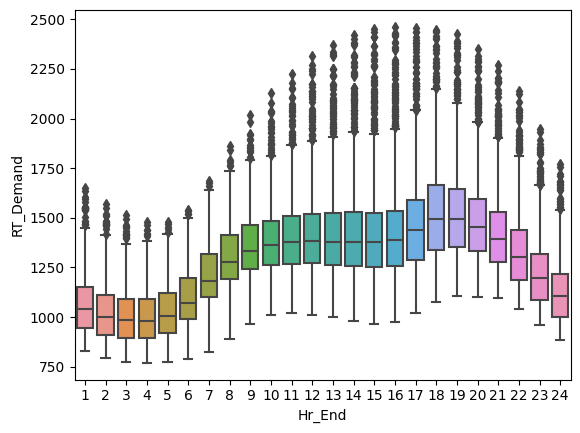

In [113]:
sns.boxplot(x = 'Hr_End', y = 'RT_Demand', data = df)

<Axes: xlabel='Hr_End', ylabel='RT_Demand'>

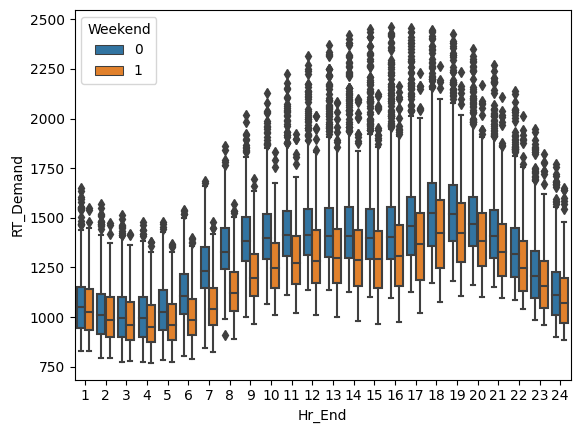

In [114]:
sns.boxplot(x = 'Hr_End', y = 'RT_Demand', hue = 'Weekend', data = df)

<Axes: xlabel='Weekend', ylabel='RT_Demand'>

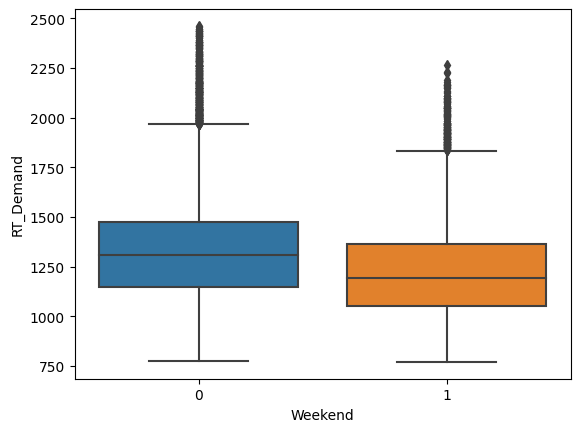

In [115]:
sns.boxplot(x = 'Weekend', y = 'RT_Demand', data = df)

<Axes: xlabel='RT_Demand', ylabel='Weekday'>

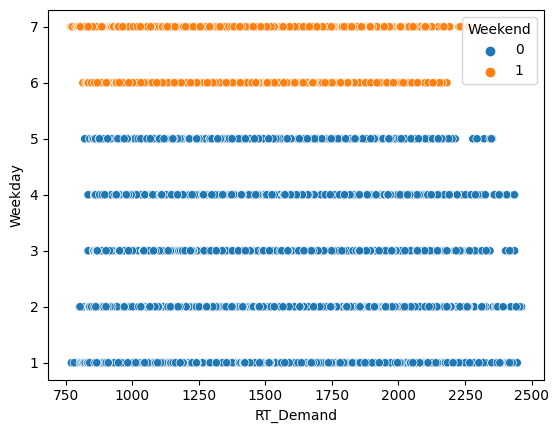

In [116]:
sns.scatterplot(data = df, x = 'RT_Demand', y = 'Weekday', hue = 'Weekend')

# Conclusions -

1. During summers, load is max. Specifically in the 7th and 8th month.
2. During the day, maximum electricity consumption occurs from 17 through 20 hours (5pm to 8pm) and least from 1 through 5 (1am to 5am).
3. On weekends, the loads consumption is less compared to that on weekdays.

# Split data

In [117]:
# Use data up to 30th Nov 2022 for training
input_data = df[pd.to_datetime(df['Date']) <= pd.to_datetime('2022-11-30')]

# Test data - Dec 2022
output_data = df[(pd.to_datetime(df['Date']) >= pd.to_datetime('2022-12-01')) & (pd.to_datetime(df['Date']) <= pd.to_datetime('2022-12-31'))]


In [118]:
input_data = pd.concat([input_data.drop('RT_Demand', axis = 1), input_data['RT_Demand']], axis = 1)
output_data = pd.concat([output_data.drop('RT_Demand', axis = 1), output_data['RT_Demand']], axis = 1)

In [119]:
input_data.columns

Index(['Date', 'Hr_End', 'Dry_Bulb', 'Dew_Point', 'DayOfWeek', 'Season',
       'Month', 'Day', 'Weekday', 'Weekend', 'Dry_Bulb_sq', 'Dew_Point_sq',
       'Dew_Point_Dry_Bulb', 'RT_Demand'],
      dtype='object')

In [120]:
columns = ['Hr_End', 'Weekday', 'Weekend', 'Dry_Bulb', 'Dew_Point', 'Dew_Point_sq', 'Dry_Bulb_sq', 'Dew_Point_Dry_Bulb']
Nov2022_X = input_data[columns]
Nov2022_y = input_data['RT_Demand']

In [121]:
Nov2022_X.head()

,Hr_End,Weekday,Weekend,Dry_Bulb,Dew_Point,Dew_Point_sq,Dry_Bulb_sq,Dew_Point_Dry_Bulb
0,1,3,0,32,30,900,1024,960
1,2,3,0,34,27,729,1156,918
2,3,3,0,34,26,676,1156,884
3,4,3,0,33,24,576,1089,792
4,5,3,0,31,24,576,961,744


In [122]:
print(Nov2022_X.shape)
print(Nov2022_y.shape)

(25560, 8)
(25560,)


In [123]:
columns = ['Hr_End', 'Weekday', 'Weekend', 'Dry_Bulb', 'Dew_Point', 'Dew_Point_sq', 'Dry_Bulb_sq', 'Dew_Point_Dry_Bulb']
Dec2022_X = output_data[columns]
Dec2022_y = output_data['RT_Demand']

In [124]:
print(Dec2022_X.shape)
print(Dec2022_y.shape)

(744, 8)
(744,)


In [125]:
X_train, X_test, y_train, y_test = train_test_split(Nov2022_X, Nov2022_y, test_size = 0.25, random_state = 123)

# Random Forest

In [126]:
model = RandomForestRegressor(n_estimators = 100, random_state = 123)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [127]:
# Prediction

y_pred_random = model.predict(X_test)

In [128]:
# Mean Squared Error

mean_squared_error(y_test, y_pred_random)

5039.182527241488

In [129]:
# R squared for predicted values

r2_score(y_test, y_pred_random)

0.9272161756367834

In [130]:
# Correlation between predicted values and actual values

np.corrcoef(y_test, y_pred_random)

array([[1.        , 0.96300113],
       [0.96300113, 1.        ]])

In [131]:
# Forecast for December 2022

y_pred_random_Dec = model.predict(Dec2022_X)

In [132]:
# Displaying the predicted values
for i, predicted_demand in enumerate(y_pred_random_Dec, start=1):
    day = i // 24 + 1
    hour = i % 24
    print(f'Predicted RT_demand for Dec {day}, 2022, Hour {hour}: {predicted_demand:.2f}')

Predicted RT_demand for Dec 1, 2022, Hour 1: 971.39
Predicted RT_demand for Dec 1, 2022, Hour 2: 952.70
Predicted RT_demand for Dec 1, 2022, Hour 3: 983.50
Predicted RT_demand for Dec 1, 2022, Hour 4: 984.98
Predicted RT_demand for Dec 1, 2022, Hour 5: 987.11
Predicted RT_demand for Dec 1, 2022, Hour 6: 1115.10
Predicted RT_demand for Dec 1, 2022, Hour 7: 1257.43
Predicted RT_demand for Dec 1, 2022, Hour 8: 1354.67
Predicted RT_demand for Dec 1, 2022, Hour 9: 1414.27
Predicted RT_demand for Dec 1, 2022, Hour 10: 1376.07
Predicted RT_demand for Dec 1, 2022, Hour 11: 1316.77
Predicted RT_demand for Dec 1, 2022, Hour 12: 1349.40
Predicted RT_demand for Dec 1, 2022, Hour 13: 1423.57
Predicted RT_demand for Dec 1, 2022, Hour 14: 1418.96
Predicted RT_demand for Dec 1, 2022, Hour 15: 1424.41
Predicted RT_demand for Dec 1, 2022, Hour 16: 1405.93
Predicted RT_demand for Dec 1, 2022, Hour 17: 1552.63
Predicted RT_demand for Dec 1, 2022, Hour 18: 1601.87
Predicted RT_demand for Dec 1, 2022, Hour 

In [133]:
# Mean Squared Error

mean_squared_error(Dec2022_y, y_pred_random_Dec)

5296.6544416625475

In [134]:
# R squared result for actual values in Dec and predicted values

r2_score(Dec2022_y, y_pred_random_Dec)

0.8431996165934745

In [135]:
# Correlation between predicted values and actual values

np.corrcoef(Dec2022_y, y_pred_random_Dec)

array([[1.        , 0.94607835],
       [0.94607835, 1.        ]])

In [136]:
# Saving the predicted values to csv file

prediction = pd.DataFrame(y_pred_random_Dec)
csv_file_path = 'Prediction_Dec.csv'
prediction.to_csv(csv_file_path, index = False)

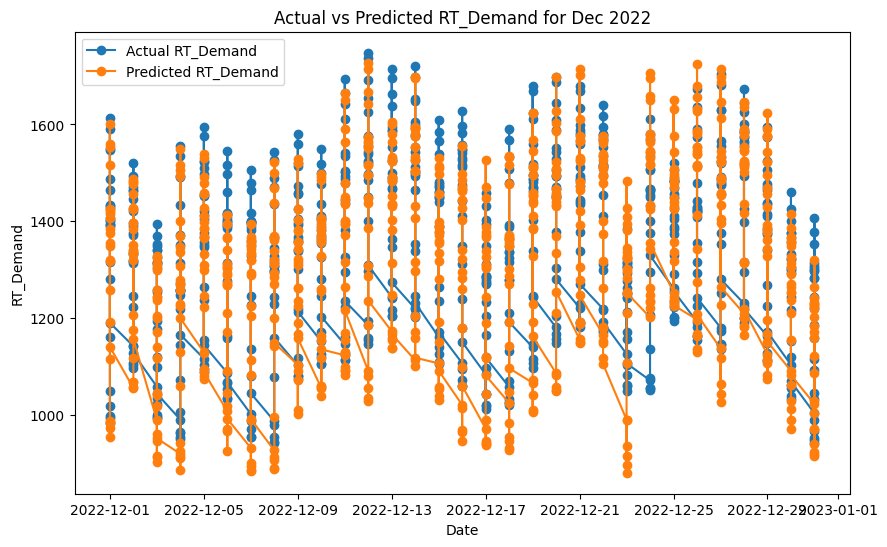

In [137]:
plt.figure(figsize = (10, 6))
plt.plot(output_data['Date'], Dec2022_y, label = 'Actual RT_Demand', marker = 'o')
plt.plot(output_data['Date'], y_pred_random_Dec, label = 'Predicted RT_Demand', marker = 'o' )
plt.title('Actual vs Predicted RT_Demand for Dec 2022')
plt.xlabel('Date')
plt.ylabel('RT_Demand')
plt.legend()
plt.show()

# Forecast for Jan 2023

In [138]:
# Forecasting the RT_demand for all the days in Jan 2023

# Function to check if a given date is a weekday (Monday to Friday)
def is_weekday(day):
    date_object = datetime.strptime(f'2023-01-{day}', '%Y-%m-%d')
    return date_object.weekday() < 5

X_Jan_2023 = [[hour, is_weekday(day), 1 - is_weekday(day), 32, 30, 30*2, 32*2, 30*32] for day in range(1, 32) for hour in range(24)]

# Predict RT_demand for each hour in January 2023
y_Jan_2023 = model.predict(X_Jan_2023)

# Displaying the predicted values
for i, predicted_demand in enumerate(y_Jan_2023, start = 1):
    day = (i - 1) // 24 + 1
    hour = (i - 1) % 24
    print(f'Predicted RT_demand for Jan {day}, 2023, Hour {hour+1}: {predicted_demand:.2f}')


# Saving the predicted values to csv file
prediction = pd.DataFrame(y_Jan_2023)
csv_file_path = 'Prediction_Jan.csv'
prediction.to_csv(csv_file_path, index = False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Predicted RT_demand for Jan 1, 2023, Hour 1: 1037.27
Predicted RT_demand for Jan 1, 2023, Hour 2: 1037.27
Predicted RT_demand for Jan 1, 2023, Hour 3: 1003.40
Predicted RT_demand for Jan 1, 2023, Hour 4: 994.03
Predicted RT_demand for Jan 1, 2023, Hour 5: 987.36
Predicted RT_demand for Jan 1, 2023, Hour 6: 1008.98
Predicted RT_demand for Jan 1, 2023, Hour 7: 1043.74
Predicted RT_demand for Jan 1, 2023, Hour 8: 1214.49
Predicted RT_demand for Jan 1, 2023, Hour 9: 1316.41
Predicted RT_demand for Jan 1, 2023, Hour 10: 1370.85
Predicted RT_demand for Jan 1, 2023, Hour 11: 1446.35
Predicted RT_demand for Jan 1, 2023, Hour 12: 1495.15
Predicted RT_demand for Jan 1, 2023, Hour 13: 1539.59
Predicted RT_demand for Jan 1, 2023, Hour 14: 1542.57
Predicted RT_demand for Jan 1, 2023, Hour 15: 1545.53
Predicted RT_demand for Jan 1, 2023, Hour 16: 1544.65
Predicted RT_demand for Jan 1, 2023, Hour 17: 1551.78
Predicted RT_demand for Jan 1, 2023, Hour 18: 1593.67
Predicted RT_demand for Jan 1, 2023, Ho